In [1]:
from datetime import timedelta
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import transformation
import data_filter as dafi
import estimate_height as esth

from scipy import signal

WAVELENTH_S1 = 0.1905 # meter


In [2]:
# 20220526 #2
import math
x = 4155252.3307
y = 674064.7850
z = 4775969.2638
lat,lon,height = transformation.xyz2latlon(x,y,z)
print(lat/math.pi*180)
print(lon/math.pi*180)
print(height)

48.797647635874426
9.214252131825374
270.97025138139725


In [3]:
main_path = 'E:/OneDrive/Studium/MA/data/phnx/'
main_path = 'E:/OneDrive/Studium/MA/data/phnx/'
main_path = os.path.abspath('../data/sc02/')
main_path = os.path.abspath('../data/phnx/')

#main_path = 'E:/OneDrive/Studium/MA/data/20220526/3/'

data_dict = dafi.generate_dataframe(main_path)
satellite_list = data_dict.keys()

azimut_mask = [0,360]
elevation_mask = [0,25]
for satellite_code in satellite_list:
    data_dict[satellite_code] = dafi.azimut_filter(data_dict[satellite_code],azimut_mask)
    data_dict[satellite_code] = dafi.elevation_filter(data_dict[satellite_code],elevation_mask)

In [4]:
print(satellite_list)

dict_keys(['G02', 'G03', 'G04', 'G06', 'G09', 'G12', 'G19', 'G20', 'G25', 'G26', 'G29', 'G31', 'G05', 'G16', 'G18', 'G07', 'G13', 'G30', 'G27', 'G15', 'G23', 'G08', 'G10', 'G14', 'G24', 'G21', 'G32', 'G01', 'G17'])


In [5]:
satellite_code = 'G01'
dataframe = data_dict[satellite_code]
print(dataframe)

                          time   azimut  elevation   snr1   snr2
0    2022-01-01 06:21:45+00:00  224.972      0.075    NaN    NaN
1    2022-01-01 06:22:00+00:00  224.971      0.175    NaN    NaN
2    2022-01-01 06:22:15+00:00  224.970      0.275    NaN    NaN
3    2022-01-01 06:22:30+00:00  224.970      0.375    NaN    NaN
4    2022-01-01 06:22:45+00:00  224.969      0.475    NaN    NaN
...                        ...      ...        ...    ...    ...
1177 2022-01-01 11:16:00+00:00  312.865      0.436  36.00  32.50
1178 2022-01-01 11:16:15+00:00  312.890      0.333  34.75  31.50
1179 2022-01-01 11:16:30+00:00  312.915      0.229  36.50  31.75
1180 2022-01-01 11:16:45+00:00  312.940      0.126  35.00  29.00
1181 2022-01-01 11:17:00+00:00  312.965      0.022  34.25  29.50

[491 rows x 5 columns]


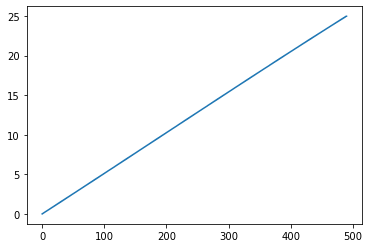

In [6]:
dataframe_sort = dataframe.sort_values(by='elevation')
plt.plot(np.array(dataframe_sort['elevation']))

[34.25   nan 35.     nan 36.5    nan 34.75   nan 36.     nan 37.75   nan
 37.   39.75 36.5  39.   38.5  38.5  38.25 39.   38.75 39.   39.   39.
 39.   37.5  39.   37.25 39.5  37.   36.25 38.75 35.75 37.75 34.5  37.5
 32.75 37.   30.25 35.75 29.5  34.   27.   32.75 22.75 29.5  21.75 26.75
 27.5  25.75 30.5  26.75 31.25 26.25 33.5  28.5  34.75 30.   35.5  31.5
 36.5  31.5  36.75 32.25 37.75 33.5  38.   34.25 38.5  35.   39.25 35.75
 39.5  37.5  39.25 38.   39.5  38.5  39.75 38.75 39.25 38.75 39.   39.25
 38.75 38.   39.25 37.75 39.   37.   38.75 36.   38.25 34.5  38.25 33.
 38.25 31.75 37.75 30.   36.5  29.   34.75 29.   32.75 29.75 30.5  30.5
 29.75 31.75 29.75 32.5  29.75 33.75 30.25 34.5  31.25 36.   32.5  36.5
 34.   37.25 34.75 37.75 36.   38.25 36.75 38.25 38.   38.5  38.   38.75
 38.   38.5  37.75 38.5  38.75 38.25 38.75 38.75 38.25 38.5  38.   38.25
 37.75 38.5  37.75 38.5  37.25 38.5  37.   38.   36.75 38.   36.   38.
 35.5  37.5  35.25 36.75 34.75 36.   34.75 35.5  34.   34.5  

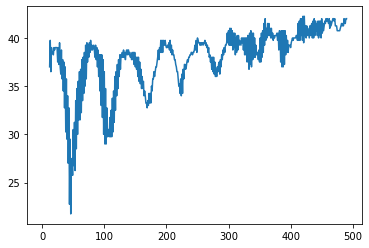

In [7]:
x = np.array(dataframe_sort['snr1'])
plt.plot(x)

print(x)

[34.25   nan 35.     nan 36.5    nan 34.75   nan 36.     nan 37.75   nan
 37.   39.75 36.5  39.   38.5  38.5  38.25 39.   38.75 39.   39.   39.
 39.   37.5  39.   37.25 39.5  37.   36.25 38.75 35.75 37.75 34.5  37.5
 32.75 37.   30.25 35.75 29.5  34.   27.   32.75 22.75 29.5  21.75 26.75
 27.5  25.75 30.5  26.75 31.25 26.25 33.5  28.5  34.75 30.   35.5  31.5
 36.5  31.5  36.75 32.25 37.75 33.5  38.   34.25 38.5  35.   39.25 35.75
 39.5  37.5  39.25 38.   39.5  38.5  39.75 38.75 39.25 38.75 39.   39.25
 38.75 38.   39.25 37.75 39.   37.   38.75 36.   38.25 34.5  38.25 33.
 38.25 31.75 37.75 30.   36.5  29.   34.75 29.   32.75 29.75 30.5  30.5
 29.75 31.75 29.75 32.5  29.75 33.75 30.25 34.5  31.25 36.   32.5  36.5
 34.   37.25 34.75 37.75 36.   38.25 36.75 38.25 38.   38.5  38.   38.75
 38.   38.5  37.75 38.5  38.75 38.25 38.75 38.75 38.25 38.5  38.   38.25
 37.75 38.5  37.75 38.5  37.25 38.5  37.   38.   36.75 38.   36.   38.
 35.5  37.5  35.25 36.75 34.75 36.   34.75 35.5  34.   34.5  

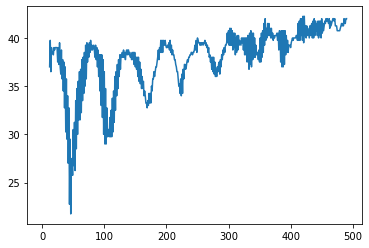

In [8]:
snr1_volt = np.array(np.exp(dataframe_sort['snr1']/20))
snr1_volt = np.array(dataframe_sort['snr1'])
plt.plot(snr1_volt)
print(snr1_volt)

In [9]:
elevation_sort = np.array(dataframe_sort['elevation'])
non_nan_index = ~np.isnan(snr1_volt)

elevation_filtered = elevation_sort[non_nan_index]
elevation_filtered = elevation_filtered.reshape(elevation_filtered.size,1)
snr1_volt_filtered = snr1_volt[non_nan_index]
snr1_volt_filtered = snr1_volt_filtered.reshape(snr1_volt_filtered.size,1)

design_matrix = np.concatenate((elevation_filtered**2,elevation_filtered,np.ones((elevation_filtered.size,1))),axis=1)
print(design_matrix)


[[4.84000000e-04 2.20000000e-02 1.00000000e+00]
 [1.58760000e-02 1.26000000e-01 1.00000000e+00]
 [5.24410000e-02 2.29000000e-01 1.00000000e+00]
 ...
 [6.18317956e+02 2.48660000e+01 1.00000000e+00]
 [6.22851849e+02 2.49570000e+01 1.00000000e+00]
 [6.23301156e+02 2.49660000e+01 1.00000000e+00]]


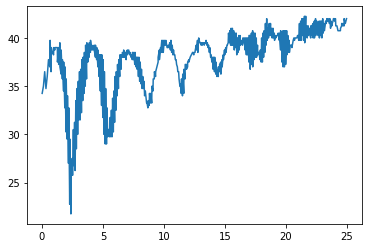

In [10]:
plt.plot(elevation_filtered,snr1_volt_filtered)

In [11]:
para = np.dot(np.linalg.solve(np.dot(design_matrix.T,design_matrix),design_matrix.T),snr1_volt_filtered)
print(para)

[[2.39852727e-03]
 [2.32742833e-01]
 [3.44923335e+01]]


(485, 1)


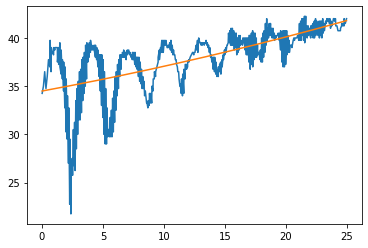

In [12]:
print(snr1_volt_filtered.shape)
snr1_ref = snr1_volt_filtered - (elevation_filtered**2 * para[0,0] + para[1,0]*elevation_filtered + para[2,0])
plt.plot(elevation_filtered,snr1_volt_filtered)
plt.plot(elevation_filtered,(elevation_filtered**2 * para[0,0] + para[1,0]*elevation_filtered + para[2,0]))


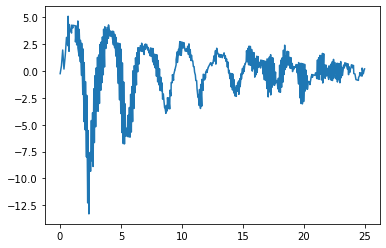

In [13]:
plt.plot(elevation_filtered,snr1_ref)

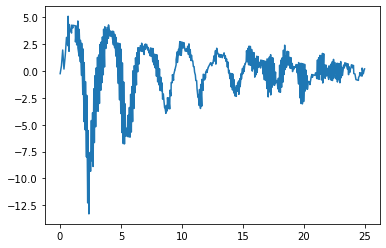

In [14]:
elevation_filtered_choosen = elevation_filtered[0:600]
snr1_ref_choosen = snr1_ref[0:600]
plt.plot(elevation_filtered_choosen,snr1_ref_choosen)


[1.85445545]


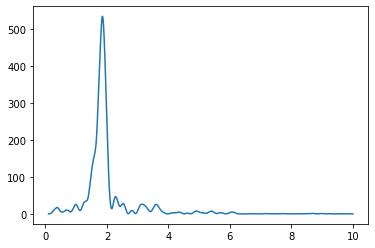

In [15]:
x_data = (np.sin(elevation_filtered_choosen*np.pi/180) * 4 * np.pi / WAVELENTH_S1).ravel()
y_data = snr1_ref_choosen.ravel()
w = np.linspace(0.1,10,10000)
power = signal.lombscargle(x_data,y_data,w,normalize=True)
power = signal.lombscargle(x_data,y_data,w)
plt.plot(w,power)

peaks,_= signal.find_peaks(power)
peaks_power = power[peaks]

h = w[peaks]
h = h[peaks_power==max(peaks_power)]
print(h)

In [16]:
def estimate_height(dataframe_in_interval, min_height, max_height):
    '''
    This function uses LSP to estimate the height:
    Args:
        dataframe_in_interval: dataframe including time, azimut, elevation
                   snr1 and snr2
        min_height and max_height: the possible heiht range
    Returns:
        height: the estimated height during the given time
    '''

    dataframe_in_interval_sort = dataframe_in_interval.sort_values(by='elevation')
    # sort data by elevation
    elevation_sort = np.array([dataframe_in_interval_sort['elevation']])
    snr = np.array([dataframe_in_interval_sort['snr1']])
    non_nan_index = ~np.isnan(snr)

    # nanfilter
    elevation_filtered = elevation_sort[non_nan_index]
    elevation_filtered = elevation_filtered.reshape(elevation_filtered.size,1)
    snr_filtered = snr[non_nan_index]
    snr_filtered = snr_filtered.reshape(snr_filtered.size,1)
    plt.plot(elevation_filtered,snr_filtered)


    # calculate the snr_ref
    design_matrix = np.concatenate((elevation_filtered**2,elevation_filtered,\
                np.ones((elevation_filtered.size,1))),axis=1)
    try:
        para = np.dot(np.linalg.solve(np.dot(design_matrix.T,design_matrix),\
                    design_matrix.T),snr_filtered)
    except:
        height = float("nan")
    else:
        snr_ref = snr_filtered - (elevation_filtered**2 * para[0,0] + \
                    para[1,0]*elevation_filtered + para[2,0])
        #snr1_ref = np.log(snr1_ref) * 10 # volt to dB

        # lsp analysis
        x_data = (np.sin(elevation_sort.T*np.pi/180) * 4 * np.pi / WAVELENTH_S1).ravel()
        y_data = snr_ref.ravel()
        frequency = np.arange(min_height,max_height+1,0.001)
        #frequency = np.arange(1,10,0.01)

    try:
        # frequency, power = LombScargle(x_data,y_data).autopower()
        power = signal.lombscargle(x_data,y_data,frequency,normalize=True)
        #plt.plot(frequency,power)
        max_power_candidate_idx = (power > max(power)/2)
        height_candidate = frequency[max_power_candidate_idx]
        power_candidate = power[max_power_candidate_idx]

        if power_candidate.size != 0:
            peaks,_= signal.find_peaks(power_candidate)
            peaks_power = power_candidate[peaks]

            height_peak = height_candidate[peaks]
            height_peak = height_peak[peaks_power==max(peaks_power)]
            height = height_peak
        else:
            height = float("nan")
    except:
        height = float("nan")
    return height

In [17]:
min_height = 1
max_height = 3 # meter
time_interval = 120 # minutes

time_delta = timedelta(minutes=time_interval)
time_start = dataframe['time'].iat[0]
time_end = time_start + time_delta
height_list = []
time_list = []
azimut_list = []
dataframe_in_interval = dataframe[(dataframe['time'] >= time_start) & \
                                    (dataframe['time'] < time_end)]



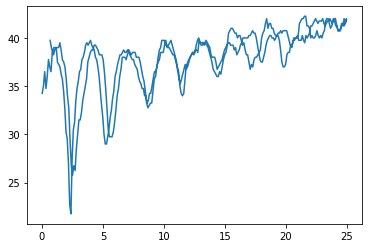

In [18]:
plt.plot(dataframe_in_interval['elevation'],dataframe_in_interval['snr1'])

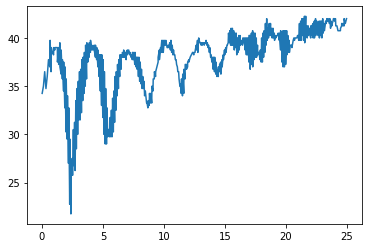

In [19]:
dataframe_in_interval_sort = dataframe_in_interval.sort_values(by='elevation')
# sort data by elevation
elevation_sort = np.array([dataframe_in_interval_sort['elevation']])
snr = np.array([dataframe_in_interval_sort['snr1']])
non_nan_index = ~np.isnan(snr)

# nanfilter
elevation_filtered = elevation_sort[non_nan_index]
elevation_filtered = elevation_filtered.reshape(elevation_filtered.size,1)
snr_filtered = snr[non_nan_index]
snr_filtered = snr_filtered.reshape(snr_filtered.size,1)
plt.plot(elevation_filtered,snr_filtered)

[1.854]


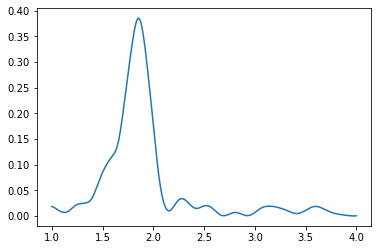

In [20]:
# calculate the snr_ref
design_matrix = np.concatenate((elevation_filtered**2,elevation_filtered,\
            np.ones((elevation_filtered.size,1))),axis=1)
try:
    para = np.dot(np.linalg.solve(np.dot(design_matrix.T,design_matrix),\
                design_matrix.T),snr_filtered)
except:
    height = float("nan")
else:
    snr_ref = snr_filtered - (elevation_filtered**2 * para[0,0] + \
                para[1,0]*elevation_filtered + para[2,0])
    #snr1_ref = np.log(snr1_ref) * 10 # volt to dB

    # lsp analysis
    x_data = (np.sin(elevation_filtered.T*np.pi/180) * 4 * np.pi / WAVELENTH_S1).ravel()
    y_data = snr_ref.ravel()
    frequency = np.arange(min_height,max_height+1,0.001)


power = signal.lombscargle(x_data,y_data,frequency,normalize=True)
plt.plot(frequency,power)
max_power_candidate_idx = (power > max(power)/2)
height_candidate = frequency[max_power_candidate_idx]
power_candidate = power[max_power_candidate_idx]

if power_candidate.size != 0:
    peaks,_= signal.find_peaks(power_candidate)
    peaks_power = power_candidate[peaks]

    height_peak = height_candidate[peaks]
    height_peak = height_peak[peaks_power==max(peaks_power)]
    height = height_peak
else:
    height = float("nan")

print(height)

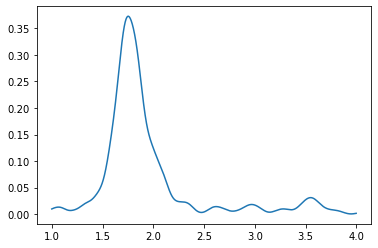

In [25]:

if not dataframe.empty:
    time_list, height_list, azimut_list = esth.split_result(dataframe,time_interval,min_height,max_height)

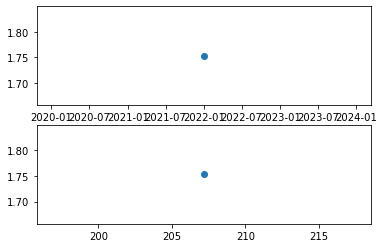

In [26]:
plt.subplot(2,1,1)
plt.scatter(time_list,height_list)
plt.subplot(2,1,2)
plt.scatter(azimut_list,height_list)

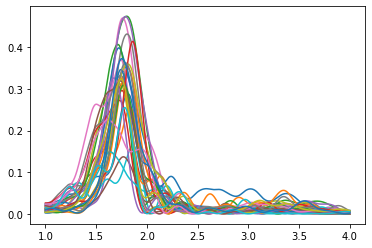

In [23]:
time_dict = {}
height_dict = {}
azimut_dict = {}
for satellite_code in data_dict:
    dataframe = data_dict[satellite_code]
    if not dataframe.empty:
        time_dict[satellite_code], height_dict[satellite_code], azimut_dict[satellite_code]\
             = esth.split_result(dataframe,time_interval,min_height,max_height)

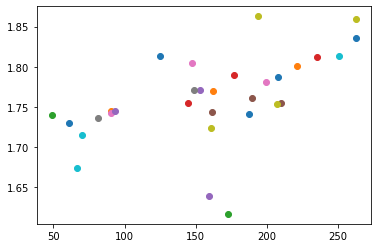

In [24]:
for satellite_code in azimut_dict:
    plt.scatter(azimut_dict[satellite_code], height_dict[satellite_code])